In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:

import chardet

# Open the file in binary mode to read raw bytes
with open('PublicTablesForCarbonCatalogueDataDescriptor_v30Oct2021.xlsx', 'rb') as file:
    raw_data = file.read()

df=pd.read_excel(raw_data)
print(df)

# Use chardet to detect the file encoding
result = chardet.detect(raw_data)

C:\Users\joynt\AppData\Local\Temp\ipykernel_23820\308017246.py:7: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  df=pd.read_excel(raw_data)


          *PCF-ID  Year of reporting *Stage-level CO2e available  \
0    10056-1-2014               2014                         Yes   
1    10056-1-2015               2015                         Yes   
2    10222-1-2013               2013                         Yes   
3    10261-1-2017               2017                         Yes   
4    10261-2-2017               2017                         Yes   
..            ...                ...                         ...   
861   9298-2-2014               2014                         Yes   
862   9298-3-2013               2013                         Yes   
863   9298-3-2014               2014                         Yes   
864   9792-1-2017               2017                          No   
865   9792-2-2017               2017                          No   

                    Product name (and functional unit)  \
0                             Frosted Flakes(R) Cereal   
1    Frosted Flakes, 23 oz, produced in Lancaster, ...   
2        

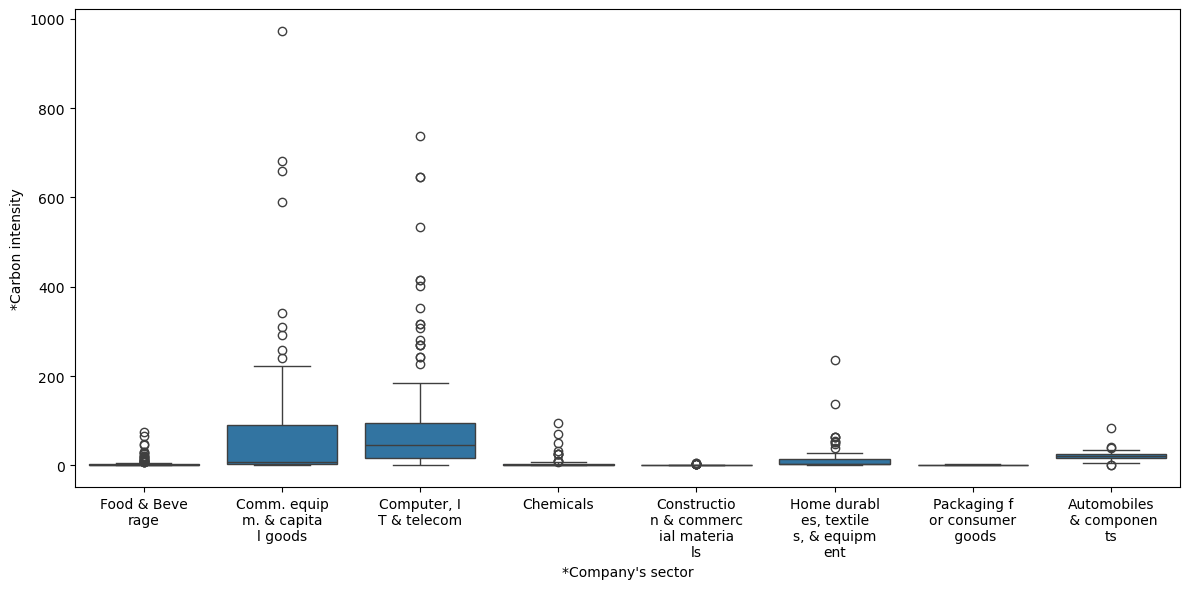

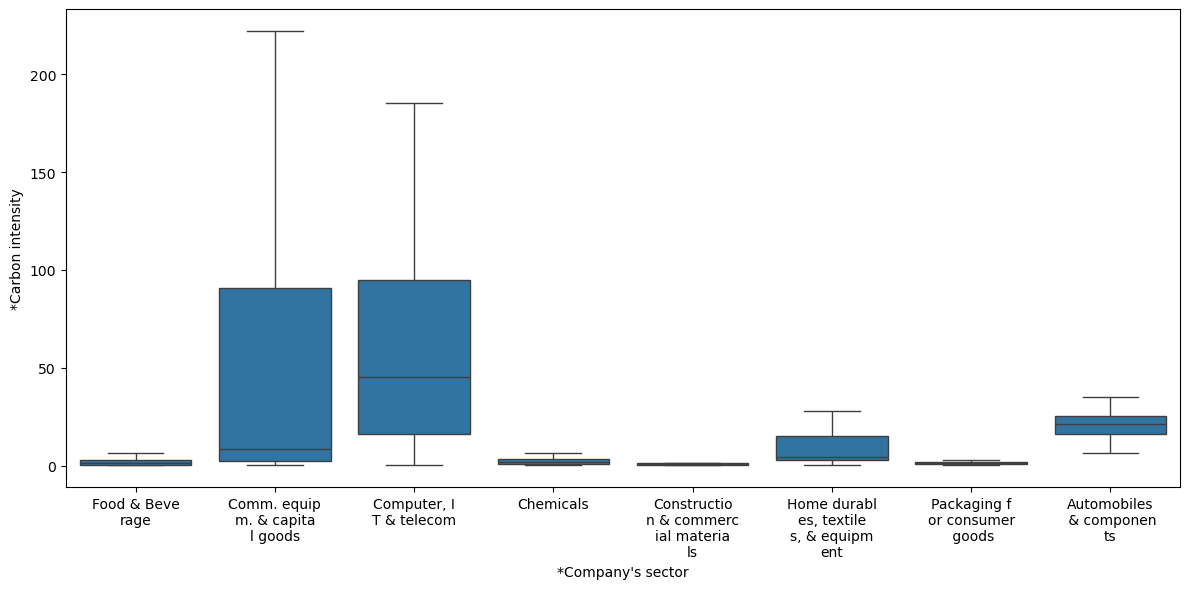

In [ ]:
# plot distribution
plt.figure(figsize=(12,6))
fig=sns.boxplot(x='*Company\'s sector', y="*Carbon intensity", data=df)
plt.tight_layout()
plt.ylabel="carbon intensity"
plt.label=('*Company\'s sector')


# Function to wrap long labels
def wrap_labels(labels, max_len=11):
    return [label if len(label) <= max_len else '\n'.join([label[i:i+max_len] for i in range(0, len(label), max_len)]) for label in labels]

# Wrap the x-axis labels
labels = plt.gca().get_xticklabels()
new_labels = wrap_labels([label.get_text() for label in labels])

# Set the new wrapped labels
plt.xticks(ticks=range(len(new_labels)), labels=new_labels, rotation=0)
plt.tight_layout()
plt.show()

#----------------------------------------------------------
plt.figure(figsize=(12,6))
fig=sns.boxplot(x='*Company\'s sector', y="*Carbon intensity", data=df, showfliers=False)
plt.tight_layout()
plt.ylabel="carbon intensity"
plt.label=('*Company\'s sector')


# Function to wrap long labels
def wrap_labels(labels, max_len=11):
    return [label if len(label) <= max_len else '\n'.join([label[i:i+max_len] for i in range(0, len(label), max_len)]) for label in labels]

# Wrap the x-axis labels
labels = plt.gca().get_xticklabels()
new_labels = wrap_labels([label.get_text() for label in labels])

# Set the new wrapped labels
plt.xticks(ticks=range(len(new_labels)), labels=new_labels, rotation=0)
plt.tight_layout()
plt.show()


                *Company's sector  *Carbon intensity  count
0        Automobiles & components               0.99      1
1        Automobiles & components               1.12      1
2        Automobiles & components               6.37      1
3        Automobiles & components               7.27      1
4        Automobiles & components               8.34      1
..                            ...                ...    ...
630  Packaging for consumer goods               1.78      1
631  Packaging for consumer goods               1.80      7
632  Packaging for consumer goods               1.89      3
633  Packaging for consumer goods               2.67      1
634  Packaging for consumer goods               2.72      1

[635 rows x 3 columns]


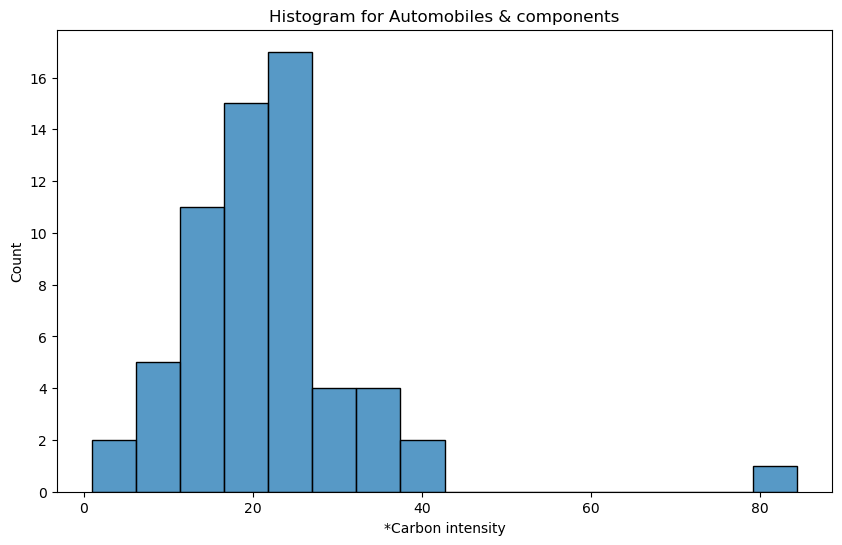

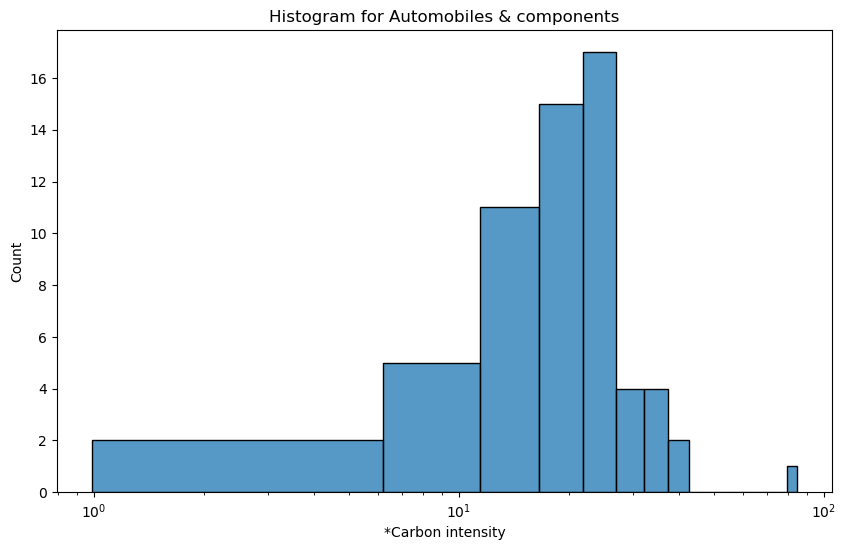

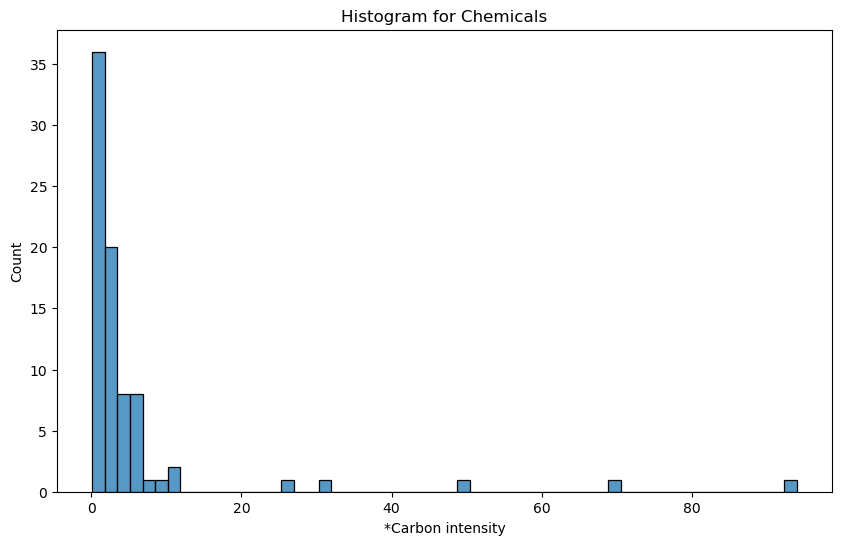

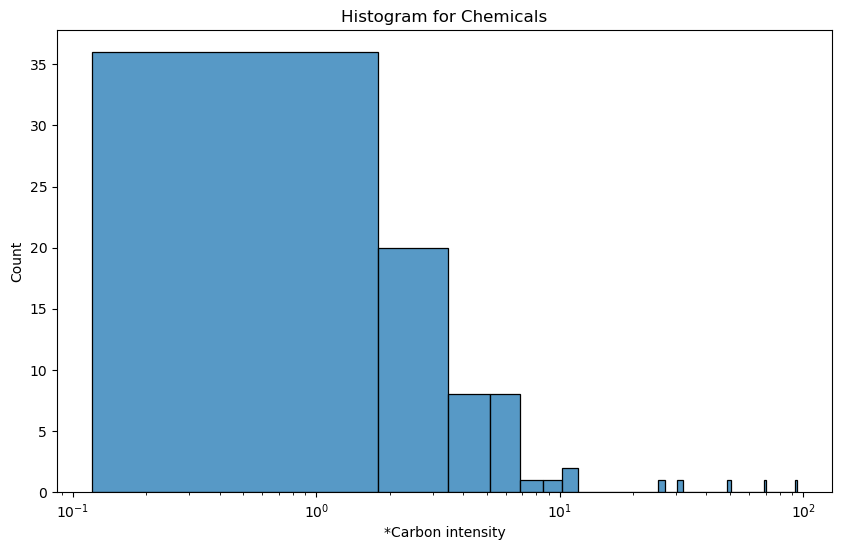

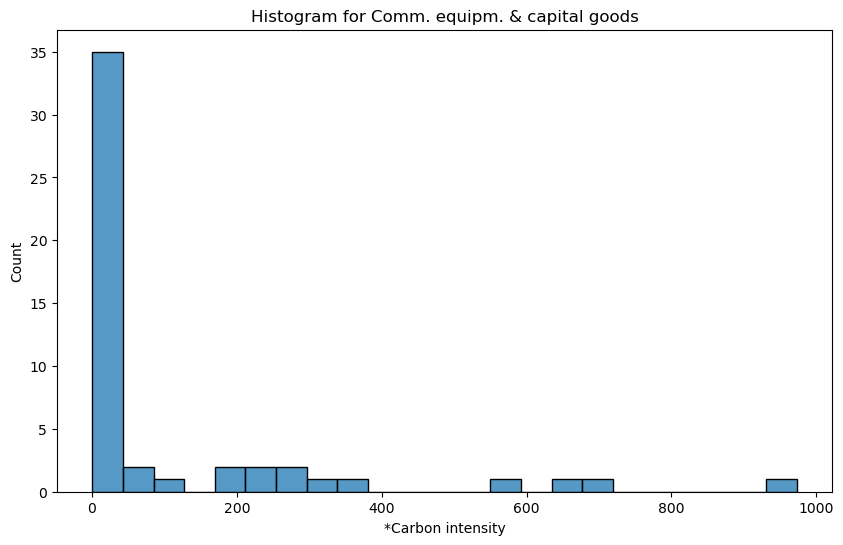

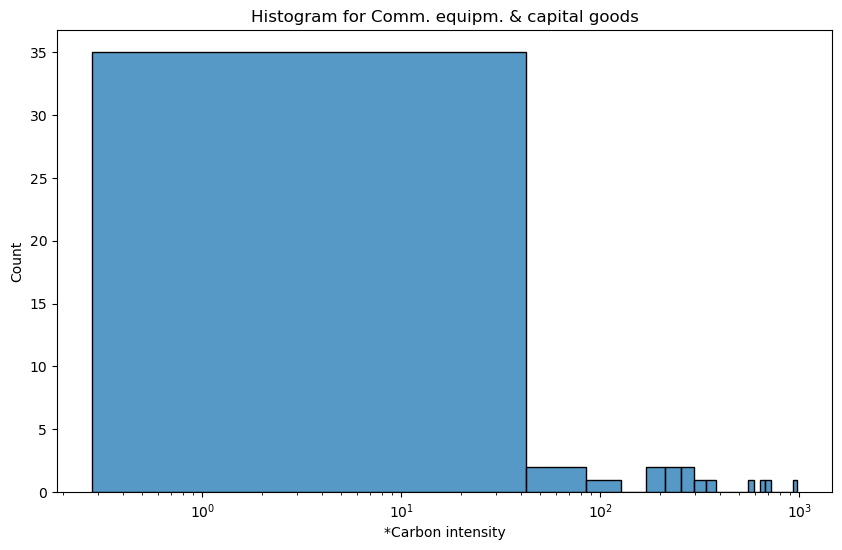

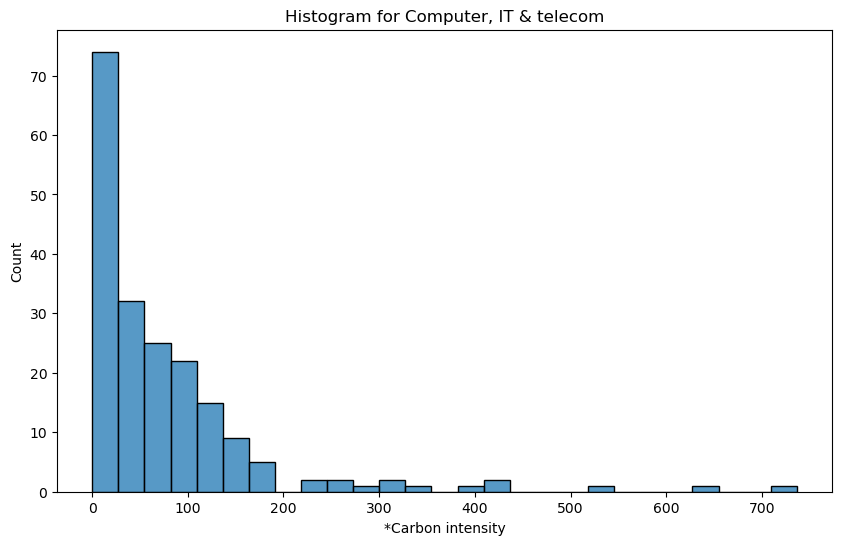

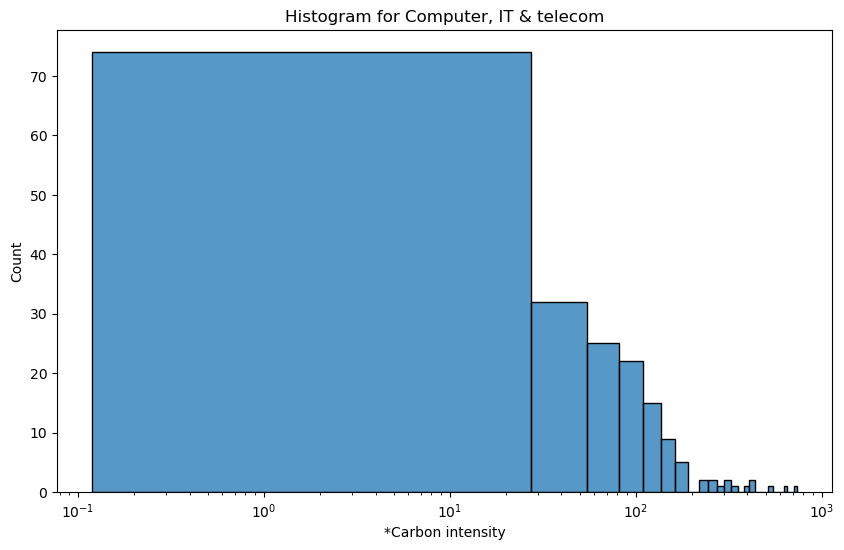

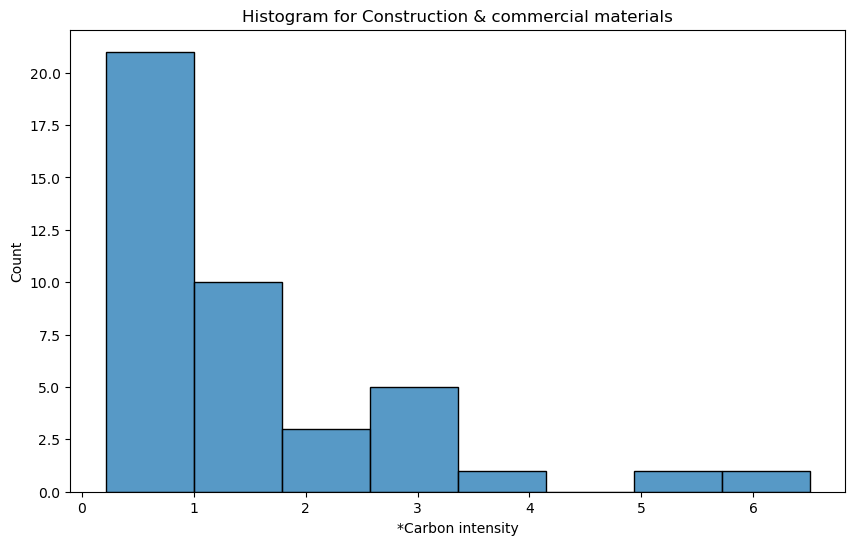

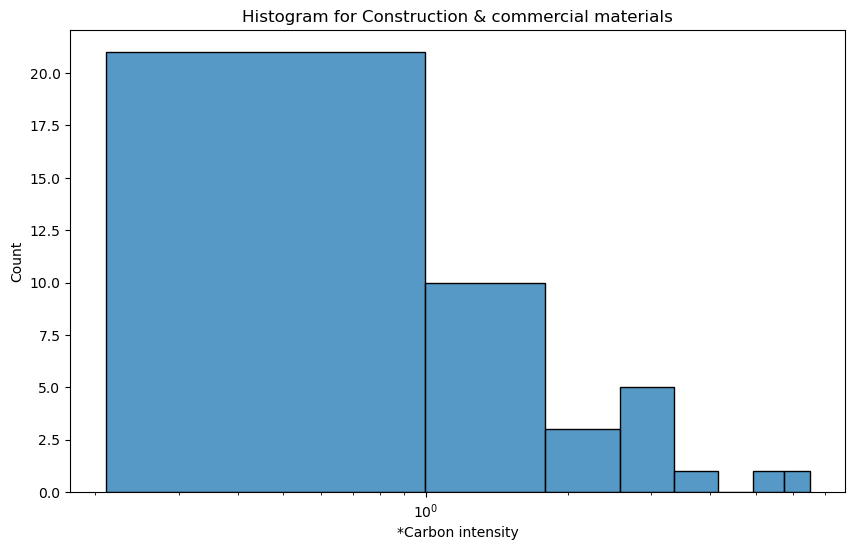

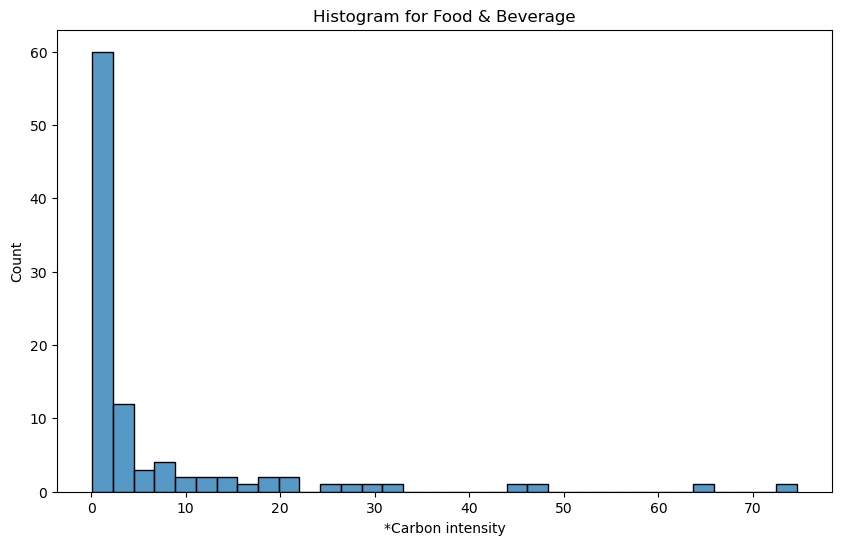

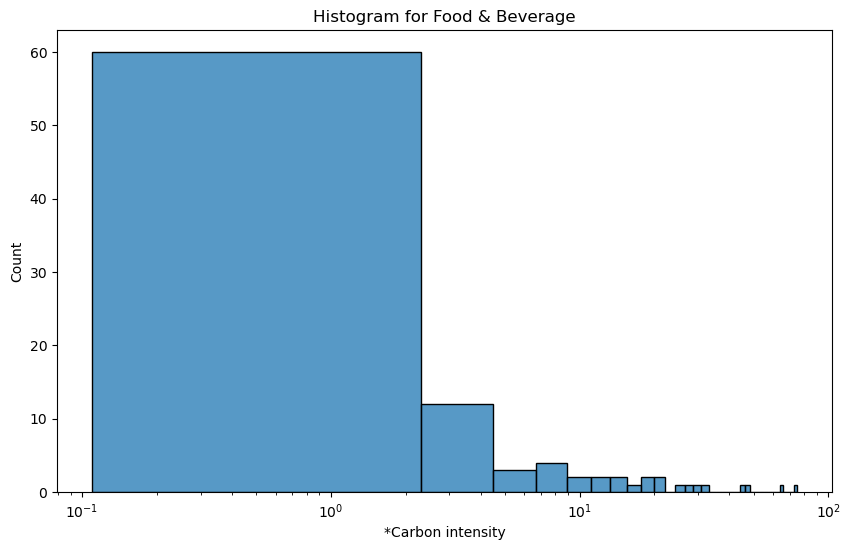

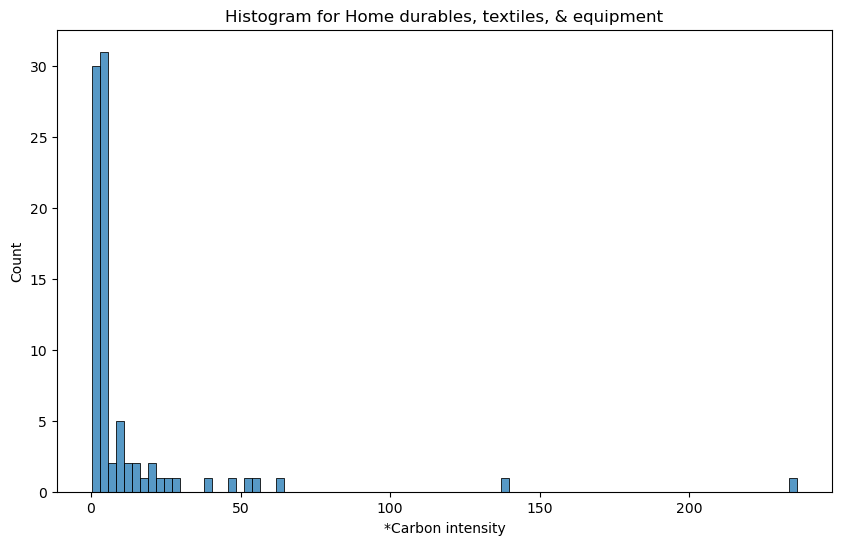

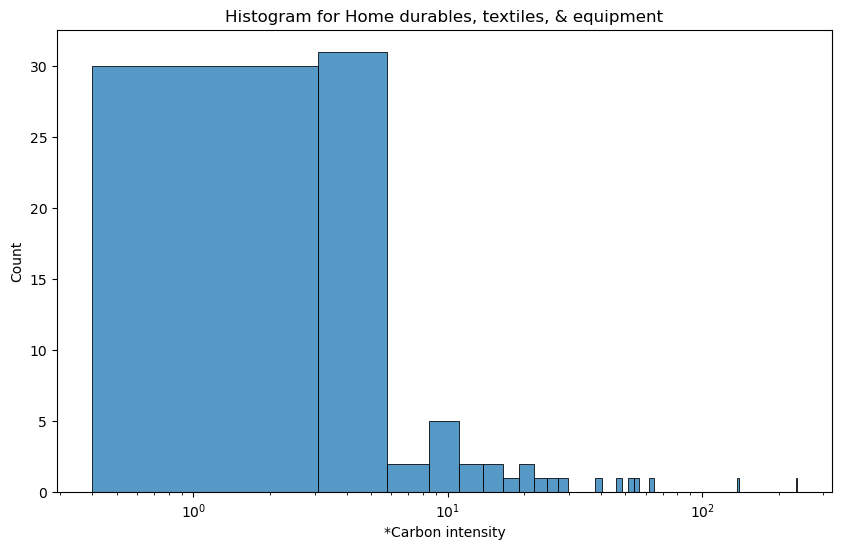

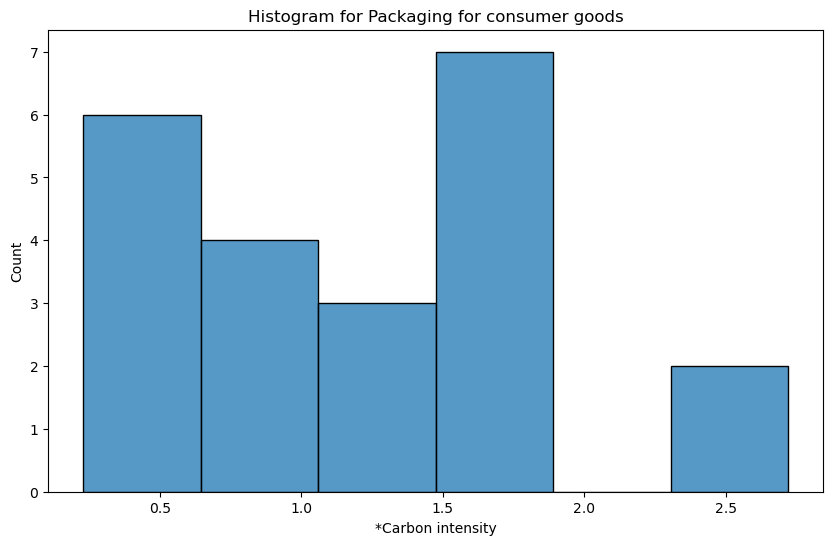

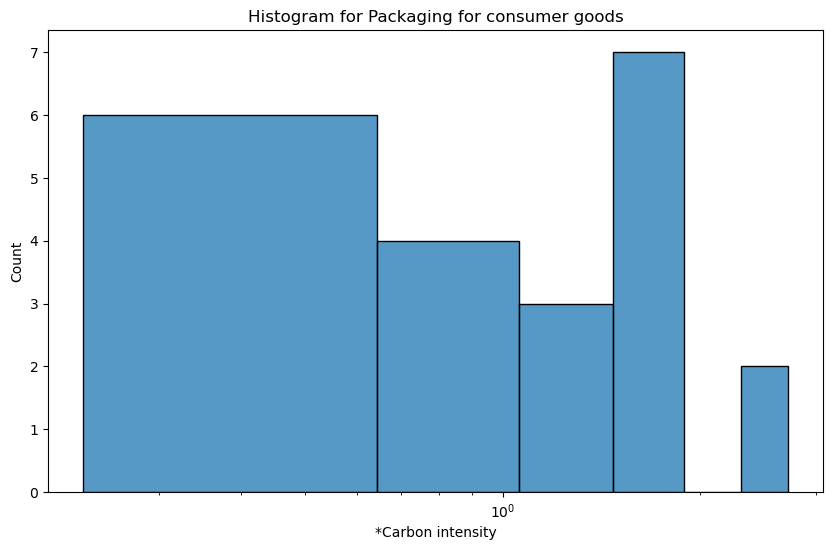

In [ ]:
new_real_sum=df.groupby(['*Company\'s sector',"*Carbon intensity"]).size()
new_real_sum_df = new_real_sum.reset_index(name='count')

print(new_real_sum_df)
for sector in new_real_sum_df['*Company\'s sector'].unique():
    # Filter the data for each sector
    sector_data = new_real_sum_df[new_real_sum_df['*Company\'s sector'] == sector]
    
    # Plot the histogram for this sector
    plt.figure(figsize=(10, 6))  # Optional: Set the figure size for each plot
    sns.histplot(data=sector_data, x="*Carbon intensity")
    plt.title(f'Histogram for {sector}')  # Add a title for each plot
    plt.show()  # Display the plot for the current sector

    # Filter the data for each sector
    sector_data = new_real_sum_df[new_real_sum_df['*Company\'s sector'] == sector]
    
    # Plot the histogram for this sector
    plt.figure(figsize=(10, 6))  # Optional: Set the figure size for each plot
    sns.histplot(data=sector_data, x="*Carbon intensity")
    plt.title(f'Histogram for {sector}')  # Add a title for each plot
    plt.xscale('log')
    plt.show()  # Display the plot for the current sector
